## downloading the data set

In [2]:
# note: i'll fix this later i was having issues w the dataloader and kaggle file so i just directly uploaded them here
from google.colab import files
# import os
# import shutil

files.upload()

# # #mount to drice
# drive.mount('/content/drive', force_remount=True)
# # setting up paths
# path_to_project_files = '/content/drive/MyDrive/dl2025spr/DeepLearning/'
# existing = os.path.join(path_to_project_files, 'kaggle.json')
# path_to_colab_utils = '/root/.kaggle'
# target = os.path.join(path_to_colab_utils, 'kaggle.json')



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyanayak26","key":"3906c6ccce8f2ff273b867baa7a7ec58"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d xhlulu/leafsnap-dataset
!unzip leafsnap-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-03-4.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-1.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-04-4.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-1.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-2.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-3.png  
  inflating: leafsnap-dataset/dataset/segmented/lab/quercus_cerris/ny1145-05-4.png  
  inflating: l

# Set up the data loader

creating the dataset and dataloader

In [4]:
# # it wasnt working so im manually uploading it
from google.colab import files
files.upload()

Saving dataloader.py to dataloader.py


{'dataloader.py': b'# import os\r\n# import numpy as np\r\n# from PIL import Image\r\n# from torch.utils.data import Dataset\r\n\r\n\r\n# class LeafsnapDataset(Dataset):\r\n#     def __init__(self, image_path, root_folder, use_segmented=False, source="both", expand_lab=False, transform=None, lab_transform=None):\r\n#         self.root_directory = root_folder\r\n#         self.transform = transform\r\n#         self.lab_transform = lab_transform\r\n\r\n#         self.data = []\r\n#         with open(image_path, \'r\') as f:\r\n#             col_names = f.readline().strip().split(\'\\t\')\r\n\r\n#             for line in f:\r\n#                 row = line.strip().split(\'\\t\')\r\n#                 self.data.append(row)\r\n\r\n#                 if ((expand_lab == True) and (row[col_names.index(\'source\')] == "lab")):\r\n#                     image_path = row[col_names.index(\'image_path\')]\r\n#                     image_path_split = image_path.split(".")\r\n#                     segmen

imports

In [2]:
from dataloader import *

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# from dataloader import LeafsnapDataset

# additional imports for the SWIN transformer
import torch.nn as nn
import timm # has the pre-trained swim models

define image transformations

In [4]:
# transformer
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# building data loader

inialize the data set

In [7]:
# # it wasnt working so im manually uploading it
# leaf snap dataset
from google.colab import files
files.upload()

Saving leafsnap-dataset-images.txt to leafsnap-dataset-images (1).txt


{'leafsnap-dataset-images (1).txt': b'file_id\timage_path\tsegmented_path\tspecies\tsource\n55497\tdataset/images/lab/abies_concolor/ny1157-01-1.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-1.png\tAbies concolor\tlab\n55498\tdataset/images/lab/abies_concolor/ny1157-01-2.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-2.png\tAbies concolor\tlab\n55499\tdataset/images/lab/abies_concolor/ny1157-01-3.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-3.png\tAbies concolor\tlab\n55500\tdataset/images/lab/abies_concolor/ny1157-01-4.jpg\tdataset/segmented/lab/abies_concolor/ny1157-01-4.png\tAbies concolor\tlab\n55501\tdataset/images/lab/abies_concolor/ny1157-02-1.jpg\tdataset/segmented/lab/abies_concolor/ny1157-02-1.png\tAbies concolor\tlab\n55502\tdataset/images/lab/abies_concolor/ny1157-02-2.jpg\tdataset/segmented/lab/abies_concolor/ny1157-02-2.png\tAbies concolor\tlab\n55503\tdataset/images/lab/abies_concolor/ny1157-02-3.jpg\tdataset/segmented/lab/abies_concolor/ny1157-02-3.png

In [5]:
root_directory = "/content/leafsnap-dataset/"
image_paths_file = root_directory + "leafsnap-dataset-images.txt"

dataset = LeafsnapDataset(image_paths_file, root_directory, use_segmented=False, transform=transform)

In [9]:
# # trial
# import torchvision.transforms.v2 as v2

# H, W = 224, 224  # important for Swin

# processor = v2.Compose([
#     v2.Resize((H, W)),
#     lambda x: x / 255.0,
#     v2.Normalize(mean=[0.485, 0.456, 0.406],
#                  std=[0.229, 0.224, 0.225])  # ImageNet normalization
# ])

# # Fix fixed_train.txt to have a proper header
# fixed_train_path = '/content/leafsnap-dataset/fixed_train.txt'

# # Read existing lines
# with open(fixed_train_path, 'r') as f:
#     lines = f.readlines()

# # If header is missing, insert it manually
# if not lines[0].startswith('image_path'):
#     lines = ['image_path\tspecies\n'] + lines

# # Write back
# with open(fixed_train_path, 'w') as f:
#     f.writelines(lines)

# print(" Header (image_path, species) added to fixed_train.txt successfully!")

# # Dataset setup
# root_directory = '/content/leafsnap-dataset/'
# train_images = os.path.join(root_directory, "fixed_train.txt")  # use fixed txt
# dataset = LeafsnapDataset(
#     train_images,
#     root_directory,
#     use_segmented=False,
#     source="both",
#     transform=processor
# )
# train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# # Test dataloader
# test_images = os.path.join(root_directory, "test.txt")
# test_dataset = LeafsnapDataset(
#     test_images,
#     root_directory,
#     use_segmented=False,
#     source="both",
#     transform=processor
# )
# test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [10]:
# import torchvision.transforms.v2 as v2

# NOISE_RATIO = 0.1
# H, W = 224, 224  # for Swin Transformer input size

# processor = v2.Compose([
#     v2.PILToTensor(),
#     lambda x: v2.functional.crop(x, 0, 0, 600, 600),
#     v2.Resize((H, W)),
#     v2.RandomHorizontalFlip(),
#     v2.RandomVerticalFlip(),
#     v2.RandomRotation(degrees=(-45, 45)),
#     lambda x: x / 255.0,
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
# ])

# lab_processor = v2.Compose([
#     v2.PILToTensor(),
#     lambda x: v2.functional.crop(x, 0, 0, 600, 600),
#     v2.Resize((H, W)),
#     v2.RandomHorizontalFlip(),
#     v2.RandomVerticalFlip(),
#     v2.RandomRotation(degrees=(-45, 45)),
#     lambda x: x / 255.0,
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# test_processor = v2.Compose([
#     v2.PILToTensor(),
#     lambda x: v2.functional.crop(x, 0, 0, 600, 600),
#     v2.Resize((H, W)),
#     lambda x: x / 255.0,
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])


In [11]:
# import os

# fixed_lines = []
# root_directory = '/content/drive/MyDrive/dl2025spr/DeepLearning/'  # Your actual root folder

# # Read original train.txt
# with open('/content/drive/MyDrive/dl2025spr/DeepLearning/train.txt', 'r') as f:
#     lines = f.readlines()

# # Keep only lines where file exists
# for line in lines:
#     parts = line.strip().split('\t')
#     img_relative_path = parts[0]  # Only first part is the path
#     img_full_path = os.path.join(root_directory, img_relative_path)
#     if os.path.exists(img_full_path):
#         fixed_lines.append(line)  # Keep whole line

# # Save a new fixed_train.txt
# with open('/content/leafsnap-dataset/fixed_train.txt', 'w') as f:
#     f.writelines(fixed_lines)

# print(f"Fixed train.txt created: {len(fixed_lines)} valid images kept.")


In [12]:
# # Rebuild with the new fixed train file
# train_image_paths_file = os.path.join(root_directory, "fixed_train.txt")

# train_dataset = LeafsnapDataset(
#     train_image_paths_file,
#     root_directory,
#     use_segmented=False,
#     source="both",
#     transform=processor,
#     lab_transform=lab_processor
# )

# train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)


build the dataloader

In [6]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

verifying that the dataloader is workin [debugging to see what it shows]


In [7]:
data_iter = iter(dataloader)
images, labels = next(data_iter)
print(f"Batch size: {images.shape}, Labels: {labels}")

Batch size: torch.Size([32, 3, 224, 224]), Labels: tensor([156,  57, 170,  56, 133, 128, 161,  50, 148, 171,  77,  39,  30, 117,
        154,  42, 181, 118,   0,  52,  44, 151, 111, 168,  30,  72,  12,  92,
          1,  44, 182, 134])


Leadsnap Dataset modification (80/20 split)


In [8]:
class LeafsnapDataset(Dataset):
  def init__(self, image_path, root_folder, image_list_file, ise_segmented=False, transform=None):
    self.root_directory = root_folder
    self.transform = transform

    # reading the list of image paths from the file in git
    with open(os.path.join(root_folder, image_list_file), 'r') as f:
      image_paths = f.read().splitlines()

    # getting the main image info from the csv file
    self.image_info = pd.read_csv(image_path, sep='\t')
    # we then filter the image_info to inlcude only paths from the file
    self.image_info = self.image_info[self.image_info['image_path'].isin(image_paths)]
    self.image_info = self.image_info.reset_index(drop=True)

    # label mapping
    label_hashmap = {}
    species_set = set(sorted(self.image_info['species'].unique()))

    for i, species in enumerate(species_set):
      label_hashmap[species] = i

    # convert the species in to numeric labels
    self.labels = [label_hashmap[species] for species in self.image_info['species']]
    # determine which image path column to use
    self.img_path_col = 'segmented_path' if use_segmented else 'image_path'

  def _len_(self):
    return len(self.image_info)

  def _getitem_(self, idx):
    # constructing the full image path
    img_name = os.path.join(self.root_directory, self.image_info.loc[idx, self_img_path_col])

    # open and transform image
    image = Image.open(img_name).convert('RGB')
    if self.transform:
      image - self.transform(image)
    return image, self.labels[idx]



## Vision Transformer (ViT) implementation


install needed libraries

In [16]:
!pip install torch torchvision timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

load pre-trained ViT model

In [15]:
import timm
import torch.nn as nn
## defining the vision transformer
class ViTLeafClassifier(nn.Module):
    def __init__(self, num_classes=185):
        super(ViTLeafClassifier, self).__init__()

        # self.vit = timm.create_model('vit_base_patch16_224', pretrained=True)  # Load ViT with pre-trained weights
        # self.vit.head = nn.Linear(self.vit.head.in_features, num_classes)  # Modify classifier for 185 leaf classes
        # updated: to make it a swin model instead of vision transformer

        self.vit = timm.create_model("swin_tiny_patch4_window7_224", pretrained=True, num_classes=185)
        # self.vit.head = nn.Linear(self.vit.head.in_features, 185)

    def forward(self, x):
        return self.vit(x)

# Train the model

this is just a sanity check to see if its working like needed

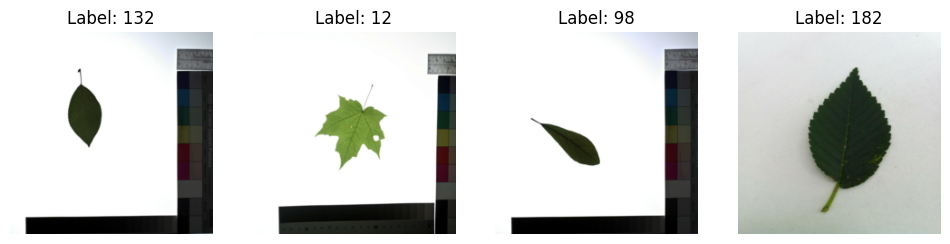

In [16]:
import matplotlib.pyplot as plt

# Get one batch from the train dataloader
data_iter = iter(dataloader)
images, labels = next(data_iter)

num_images_to_show = 4
# Plot a few sample images with their labels
plt.figure(figsize=(12, 6))
for idx in range(num_images_to_show):
    img = images[idx].cpu()
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)  # Undo normalization
    img = img.permute(1, 2, 0).numpy()  # (C, H, W) --> (H, W, C)
    img = img.clip(0, 1)

    plt.subplot(1, num_images_to_show, idx+1)
    plt.imshow(img)
    plt.title(f"Label: {labels[idx].item()}")
    plt.axis('off')

plt.show()


In [17]:
# i have trained it like 3 times already and it randomly crashes or my laptop does, i will finish training in a bit and push again ik colab hates me rn
# training loop
# Define the device
import torch
from tqdm import tqdm # for the bar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Initialize model, loss function, and optimizer
model = ViTLeafClassifier(num_classes=185).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# Training loop
num_epochs = 10
print(f"\n Starting Training on {device}\n")

for epoch in range(num_epochs):
    model.train()

    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

    running_loss = 0.0
    correct = 0
    total = 0

    # print(f"\n Epoch {epoch+1}/{num_epochs}")

    for batch_idx, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device) # move data ti device

        optimizer.zero_grad() # we zero the parameter gradients
        # forward pass
        outputs = model(images)

        # loss = criterion(outputs, labels)
        labels = labels.long()
        loss = criterion(outputs, labels)
        # backward pass
        loss.backward()
        optimizer.step()

        # update the stats
        running_loss += loss.item()

        # track accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # update the progress bar
        # progress_bar.set_postfix({
        #     'Loss': f'{loss.item(): .4f}',
        #     'Avg Loss': f'{running_loss / (batch_idx + 1): .4f}',
        #     'Accuracy': f'{100 * correct / total:.2f}%'
        # })
        # Print updates every 10 batches
        if (batch_idx + 1) % 10 == 0 or batch_idx == 0:
            print(f"  Batch {batch_idx+1}/{len(dataloader)} | Loss: {loss.item():.4f} | Running Avg Loss: {running_loss / (batch_idx + 1):.4f}")

    # summary
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    print(f"\n Epoch {epoch+1} Finished - Avg Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%")

print("\n Training Complete!")


 Starting Training on cuda




Epoch 1/10:   0%|          | 0/965 [03:36<?, ?batch/s]


  Batch 1/965 | Loss: 5.1889 | Running Avg Loss: 5.1889
  Batch 10/965 | Loss: 5.1535 | Running Avg Loss: 5.2188
  Batch 20/965 | Loss: 4.8923 | Running Avg Loss: 5.1461
  Batch 30/965 | Loss: 4.8345 | Running Avg Loss: 5.0640
  Batch 40/965 | Loss: 4.0987 | Running Avg Loss: 4.9191
  Batch 50/965 | Loss: 4.0230 | Running Avg Loss: 4.7499
  Batch 60/965 | Loss: 3.6484 | Running Avg Loss: 4.5906
  Batch 70/965 | Loss: 3.4503 | Running Avg Loss: 4.4470
  Batch 80/965 | Loss: 3.4016 | Running Avg Loss: 4.2920
  Batch 90/965 | Loss: 2.3752 | Running Avg Loss: 4.1361
  Batch 100/965 | Loss: 2.7890 | Running Avg Loss: 3.9935
  Batch 110/965 | Loss: 1.7852 | Running Avg Loss: 3.8596
  Batch 120/965 | Loss: 2.6591 | Running Avg Loss: 3.7421
  Batch 130/965 | Loss: 1.9763 | Running Avg Loss: 3.6263
  Batch 140/965 | Loss: 2.0985 | Running Avg Loss: 3.5249
  Batch 150/965 | Loss: 1.7941 | Running Avg Loss: 3.4282
  Batch 160/965 | Loss: 1.7996 | Running Avg Loss: 3.3302
  Batch 170/965 | Loss: 1

Epoch 1/10:   0%|          | 0/965 [06:31<?, ?batch/s]


  Batch 1/965 | Loss: 0.3155 | Running Avg Loss: 0.3155
  Batch 10/965 | Loss: 0.3613 | Running Avg Loss: 0.4660
  Batch 20/965 | Loss: 0.3939 | Running Avg Loss: 0.4012
  Batch 30/965 | Loss: 0.3528 | Running Avg Loss: 0.4033
  Batch 40/965 | Loss: 0.6870 | Running Avg Loss: 0.4038
  Batch 50/965 | Loss: 0.4844 | Running Avg Loss: 0.4004
  Batch 60/965 | Loss: 0.5502 | Running Avg Loss: 0.4113
  Batch 70/965 | Loss: 0.2446 | Running Avg Loss: 0.4054
  Batch 80/965 | Loss: 0.4511 | Running Avg Loss: 0.4025
  Batch 90/965 | Loss: 0.5167 | Running Avg Loss: 0.4070
  Batch 100/965 | Loss: 0.3954 | Running Avg Loss: 0.3961
  Batch 110/965 | Loss: 0.2966 | Running Avg Loss: 0.3938
  Batch 120/965 | Loss: 0.3903 | Running Avg Loss: 0.3938
  Batch 130/965 | Loss: 0.3112 | Running Avg Loss: 0.3865
  Batch 140/965 | Loss: 0.3253 | Running Avg Loss: 0.3869
  Batch 150/965 | Loss: 0.2670 | Running Avg Loss: 0.3860
  Batch 160/965 | Loss: 0.2756 | Running Avg Loss: 0.3841
  Batch 170/965 | Loss: 0


Epoch 2/10:   0%|          | 0/965 [06:29<?, ?batch/s]


  Batch 1/965 | Loss: 0.2167 | Running Avg Loss: 0.2167
  Batch 10/965 | Loss: 0.3976 | Running Avg Loss: 0.2784
  Batch 20/965 | Loss: 0.2971 | Running Avg Loss: 0.2403
  Batch 30/965 | Loss: 0.1738 | Running Avg Loss: 0.2235
  Batch 40/965 | Loss: 0.2453 | Running Avg Loss: 0.2517
  Batch 50/965 | Loss: 0.0405 | Running Avg Loss: 0.2432
  Batch 60/965 | Loss: 0.2347 | Running Avg Loss: 0.2410
  Batch 70/965 | Loss: 0.2321 | Running Avg Loss: 0.2437
  Batch 80/965 | Loss: 0.1855 | Running Avg Loss: 0.2469
  Batch 90/965 | Loss: 0.1579 | Running Avg Loss: 0.2481
  Batch 100/965 | Loss: 0.0345 | Running Avg Loss: 0.2530
  Batch 110/965 | Loss: 0.3295 | Running Avg Loss: 0.2548
  Batch 120/965 | Loss: 0.0813 | Running Avg Loss: 0.2520
  Batch 130/965 | Loss: 0.2661 | Running Avg Loss: 0.2520
  Batch 140/965 | Loss: 0.1079 | Running Avg Loss: 0.2538
  Batch 150/965 | Loss: 0.2512 | Running Avg Loss: 0.2511
  Batch 160/965 | Loss: 0.1941 | Running Avg Loss: 0.2468
  Batch 170/965 | Loss: 0

Epoch 3/10:   0%|          | 0/965 [06:30<?, ?batch/s]


  Batch 1/965 | Loss: 0.1920 | Running Avg Loss: 0.1920
  Batch 10/965 | Loss: 0.3410 | Running Avg Loss: 0.2559
  Batch 20/965 | Loss: 0.1989 | Running Avg Loss: 0.2387
  Batch 30/965 | Loss: 0.0625 | Running Avg Loss: 0.2334
  Batch 40/965 | Loss: 0.2523 | Running Avg Loss: 0.2260
  Batch 50/965 | Loss: 0.6874 | Running Avg Loss: 0.2316
  Batch 60/965 | Loss: 0.0871 | Running Avg Loss: 0.2179
  Batch 70/965 | Loss: 0.2677 | Running Avg Loss: 0.2212
  Batch 80/965 | Loss: 0.0864 | Running Avg Loss: 0.2145
  Batch 90/965 | Loss: 0.2138 | Running Avg Loss: 0.2117
  Batch 100/965 | Loss: 0.1478 | Running Avg Loss: 0.2054
  Batch 110/965 | Loss: 0.2375 | Running Avg Loss: 0.2003
  Batch 120/965 | Loss: 0.3728 | Running Avg Loss: 0.2008
  Batch 130/965 | Loss: 0.2420 | Running Avg Loss: 0.2027
  Batch 140/965 | Loss: 0.0495 | Running Avg Loss: 0.2026
  Batch 150/965 | Loss: 0.0519 | Running Avg Loss: 0.2028
  Batch 160/965 | Loss: 0.1264 | Running Avg Loss: 0.2029
  Batch 170/965 | Loss: 0


Epoch 4/10:   0%|          | 0/965 [06:29<?, ?batch/s]


  Batch 1/965 | Loss: 0.3963 | Running Avg Loss: 0.3963
  Batch 10/965 | Loss: 0.3211 | Running Avg Loss: 0.2817
  Batch 20/965 | Loss: 0.0582 | Running Avg Loss: 0.2637
  Batch 30/965 | Loss: 0.0930 | Running Avg Loss: 0.2642
  Batch 40/965 | Loss: 0.0037 | Running Avg Loss: 0.2567
  Batch 50/965 | Loss: 0.0579 | Running Avg Loss: 0.2439
  Batch 60/965 | Loss: 0.1789 | Running Avg Loss: 0.2313
  Batch 70/965 | Loss: 0.1209 | Running Avg Loss: 0.2257
  Batch 80/965 | Loss: 0.1430 | Running Avg Loss: 0.2122
  Batch 90/965 | Loss: 0.0775 | Running Avg Loss: 0.2049
  Batch 100/965 | Loss: 0.0854 | Running Avg Loss: 0.1988
  Batch 110/965 | Loss: 0.1820 | Running Avg Loss: 0.1946
  Batch 120/965 | Loss: 0.0623 | Running Avg Loss: 0.1858
  Batch 130/965 | Loss: 0.1358 | Running Avg Loss: 0.1866
  Batch 140/965 | Loss: 0.0160 | Running Avg Loss: 0.1842
  Batch 150/965 | Loss: 0.1431 | Running Avg Loss: 0.1814
  Batch 160/965 | Loss: 0.1671 | Running Avg Loss: 0.1792
  Batch 170/965 | Loss: 0

Epoch 5/10:   0%|          | 0/965 [06:29<?, ?batch/s]


  Batch 1/965 | Loss: 0.1313 | Running Avg Loss: 0.1313
  Batch 10/965 | Loss: 0.1152 | Running Avg Loss: 0.1710
  Batch 20/965 | Loss: 0.2119 | Running Avg Loss: 0.1587
  Batch 30/965 | Loss: 0.4647 | Running Avg Loss: 0.1710
  Batch 40/965 | Loss: 0.4298 | Running Avg Loss: 0.1832
  Batch 50/965 | Loss: 0.3683 | Running Avg Loss: 0.1906
  Batch 60/965 | Loss: 0.1543 | Running Avg Loss: 0.1771
  Batch 70/965 | Loss: 0.0595 | Running Avg Loss: 0.1684
  Batch 80/965 | Loss: 0.1745 | Running Avg Loss: 0.1677
  Batch 90/965 | Loss: 0.0502 | Running Avg Loss: 0.1596
  Batch 100/965 | Loss: 0.4005 | Running Avg Loss: 0.1662
  Batch 110/965 | Loss: 0.2047 | Running Avg Loss: 0.1645
  Batch 120/965 | Loss: 0.1634 | Running Avg Loss: 0.1621
  Batch 130/965 | Loss: 0.1394 | Running Avg Loss: 0.1592
  Batch 140/965 | Loss: 0.1126 | Running Avg Loss: 0.1572
  Batch 150/965 | Loss: 0.1656 | Running Avg Loss: 0.1576
  Batch 160/965 | Loss: 0.2159 | Running Avg Loss: 0.1582
  Batch 170/965 | Loss: 0

KeyboardInterrupt: 

# Evaluating the model

In [18]:
# top-1 accuracy, top-5 accuracy, and macro f1
from sklearn.metrics import accuracy_score, f1_score
import torch

model.eval()
all_preds = []
all_labels = []
top5_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        #Top-1 Predictions
        _, top1_preds = torch.max(outputs, 1)
        all_preds.extend(top1_preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Top-5 Accuracy
        top5_preds = torch.topk(outputs, k=5, dim=1).indices  # Get top-5 indices
        top5_correct += torch.sum(top5_preds.eq(labels.view(-1, 1)))  # Count correct top-5
        total_samples += labels.size(0)

#Calculate Metrics
top1_accuracy = accuracy_score(all_labels, all_preds)
top5_accuracy = top5_correct.item() / total_samples
macro_f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Top-1 Accuracy: {top1_accuracy:.4f}") # 60.45
print(f"Top-5 Accuracy: {top5_accuracy:.4f}") # 88.53
print(f"Macro F1 Score: {macro_f1:.4f}") # 59.03


Top-1 Accuracy: 0.9706
Top-5 Accuracy: 0.9988
Macro F1 Score: 0.9710


Result comparison

ViT Results:
$$\text{Top-1 Accuracy}: 0.6045$$
$$\text{Top-5 Accuracy}: 0.8853$$
$$\text{Macro F1 Score}: 0.59.03$$

Swim Transformer:
$$\text{Top-1 Accuracy}: 0.9706$$
$$\text{Top-5 Accuracy}: 0.9988$$
$$\text{Macro F1 Score}: 0.9710$$

These results seem wrong, possibly because of overfitting. There could also be a test leakage if the there is an overlap between the test and train images. I will tweak the dataset and come back.

saving

In [ ]:
torch.save(model.state_dict(), "vit_leafsnap.pth")